# Amazon Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

### Data Preaparing and Data Cleaning

In [18]:
data=pd.read_excel('C:/Users/hp/Downloads/data (1).xlsx')
data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10002220,2017-07-14,368.790,2017-07-14,100233,20910,Moms Sliced Turkey,1000,824.960,200245,2017-07-14,456.17,824.960,0.0,456.17,456.170000,1,127,EA
1,10002220,2017-10-17,109.730,2017-10-17,116165,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.660,213157,2017-10-16,438.93,548.660,0.0,438.93,438.930000,1,127,EA
2,10004516,2017-05-27,96627.940,2017-05-27,103341,60776,High Top Sweet Onion,1000,408.520,203785,2017-05-28,89248.66,185876.600,0.0,89248.66,196.150901,455,124,SE
3,10007866,2017-09-03,371.014,2017-09-03,100403,20910,Moms Sliced Turkey,2000,795.314,200436,2017-09-03,424.30,795.314,0.0,424.30,424.300000,1,149,EA
4,10009356,2017-06-18,608.080,2017-06-18,105481,62550,Tell Tale Garlic,29000,575.000,205213,2017-06-18,541.92,1150.000,0.0,541.92,270.960000,2,103,EA


In [13]:
data.info

<bound method DataFrame.info of         CustKey    DateKey  Discount Amount Invoice Date  Invoice Number  \
0      10002220 2017-07-14          368.790   2017-07-14          100233   
1      10002220 2017-10-17          109.730   2017-10-17          116165   
2      10004516 2017-05-27        96627.940   2017-05-27          103341   
3      10007866 2017-09-03          371.014   2017-09-03          100403   
4      10009356 2017-06-18          608.080   2017-06-18          105481   
...         ...        ...              ...          ...             ...   
65236  10017638 2018-03-21          505.780   2018-03-21          226497   
65237  10017638 2018-03-21          410.750   2018-03-21          226497   
65238  10017638 2018-03-21          876.160   2018-03-21          226497   
65239  10017638 2018-03-21        24226.770   2018-03-21          226498   
65240  10017638 2018-03-21        24479.260   2018-03-21          226498   

      Item Number                             Item  Lin

In [14]:
data.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.524100e+04,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000
mean,1.001770e+07,1857.310923,216292.785242,23725.043178,515.016834,180567.610122,2853.121051,4710.431974,1662.023052,1191.097999,283.250283,45.106712,137.421422
std,7.175846e+03,9039.535784,94982.018695,32669.565014,449.144896,67612.238675,15169.020896,20702.609533,9559.396917,5862.566647,250.448615,429.793733,26.644271
min,1.000045e+07,-255820.800000,100034.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000
25%,1.001272e+07,246.280000,117969.000000,3000.000000,181.560000,115281.000000,308.310000,561.040000,167.810000,129.890000,100.030000,2.000000,113.000000
50%,1.001966e+07,442.200000,222904.000000,12000.000000,325.190000,203695.000000,553.940000,999.750000,304.580000,246.480000,183.282857,3.000000,134.000000
75%,1.002351e+07,1001.500000,314325.000000,32000.000000,803.860000,218576.000000,1279.750000,2321.400000,688.550000,578.220000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

CustKey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item Number                         0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [19]:
data.head(2)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10002220,2017-07-14,368.79,2017-07-14,100233,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.17,1,127,EA
1,10002220,2017-10-17,109.73,2017-10-17,116165,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.93,1,127,EA


In [21]:
data.drop(['U/M'], axis=1, inplace=True)
data.head(5)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
0,10002220,2017-07-14,368.790,2017-07-14,100233,20910,Moms Sliced Turkey,1000,824.960,200245,2017-07-14,456.17,824.960,0.0,456.17,456.170000,1,127
1,10002220,2017-10-17,109.730,2017-10-17,116165,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.660,213157,2017-10-16,438.93,548.660,0.0,438.93,438.930000,1,127
2,10004516,2017-05-27,96627.940,2017-05-27,103341,60776,High Top Sweet Onion,1000,408.520,203785,2017-05-28,89248.66,185876.600,0.0,89248.66,196.150901,455,124
3,10007866,2017-09-03,371.014,2017-09-03,100403,20910,Moms Sliced Turkey,2000,795.314,200436,2017-09-03,424.30,795.314,0.0,424.30,424.300000,1,149
4,10009356,2017-06-18,608.080,2017-06-18,105481,62550,Tell Tale Garlic,29000,575.000,205213,2017-06-18,541.92,1150.000,0.0,541.92,270.960000,2,103


In [22]:
data.isnull().sum()

CustKey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item Number                         0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
dtype: int64

In [28]:
data['Years']=pd.DatetimeIndex(data.DateKey).year
data['Months']=pd.DatetimeIndex(data.DateKey).month
data['Days']=pd.DatetimeIndex(data.DateKey).day
data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Order Number,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Years,Months,Days
0,10002220,2017-07-14,368.790,2017-07-14,100233,20910,Moms Sliced Turkey,1000,824.960,200245,...,456.17,824.960,0.0,456.17,456.170000,1,127,2017,7,14
1,10002220,2017-10-17,109.730,2017-10-17,116165,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.660,213157,...,438.93,548.660,0.0,438.93,438.930000,1,127,2017,10,17
2,10004516,2017-05-27,96627.940,2017-05-27,103341,60776,High Top Sweet Onion,1000,408.520,203785,...,89248.66,185876.600,0.0,89248.66,196.150901,455,124,2017,5,27
3,10007866,2017-09-03,371.014,2017-09-03,100403,20910,Moms Sliced Turkey,2000,795.314,200436,...,424.30,795.314,0.0,424.30,424.300000,1,149,2017,9,3
4,10009356,2017-06-18,608.080,2017-06-18,105481,62550,Tell Tale Garlic,29000,575.000,205213,...,541.92,1150.000,0.0,541.92,270.960000,2,103,2017,6,18


In [30]:
new_data=data[['CustKey','Years','Months','Days','Sales Amount','Sales Quantity']]
new_data.head()

,CustKey,Years,Months,Days,Sales Amount,Sales Quantity
0,10002220,2017,7,14,456.17,1
1,10002220,2017,10,17,438.93,1
2,10004516,2017,5,27,89248.66,455
3,10007866,2017,9,3,424.30,1
4,10009356,2017,6,18,541.92,2


In [34]:
address=pd.read_excel('C:/Users/hp/Downloads/Countries.xlsx')
address.head()

,Address Number,City,Country,Customer Address 1,Customer Address 2,Customer Address 3,Customer Address 4,State,Zip Code
0,10000000,Akron,US,PO Box 6258,,,,OH,44312
1,10000453,,UK,,,,,NaN,
2,10000455,Huntington Beach,US,7392 Count Circle,,,,CA,92647
3,10000456,Edmonton,CA,8151 Wagner Road,,,,AB,T6E 4N6
4,10000458,Saginaw,US,PO Box 840,,,,MI,48606


In [36]:
address1=pd.read_excel('C:/Users/hp/Downloads/customers.xlsx')
address1.head()

,Address Number,Business Family,Business Unit,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type
0,10000000,R3,1,City Supermarket,10000000,G2,2,,816-455-8733,4,S16,C
1,10000453,R3,1,A Supermarket,10000453,G1,1,,816-455-8733,5,S19,C
2,10000455,R3,1,Caribian Supermarket,10000455,G2,2,,816-455-8733,1,S16,C
3,10000456,R1,1,A&B Shop,10000456,G3,1,,816-455-8733,0,S2,C
4,10000457,O2,1,A&G Shop,10000457,G1,1,,816-455-8733,5,S1,C


In [38]:
#merge
merged=address.merge(address1, on ="Address Number")
merged.head()

,Address Number,City,Country,Customer Address 1,Customer Address 2,Customer Address 3,Customer Address 4,State,Zip Code,Business Family,Business Unit,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type
0,10000000,Akron,US,PO Box 6258,,,,OH,44312,R3,1,City Supermarket,10000000,G2,2,,816-455-8733,4,S16,C
1,10000453,,UK,,,,,NaN,,R3,1,A Supermarket,10000453,G1,1,,816-455-8733,5,S19,C
2,10000455,Huntington Beach,US,7392 Count Circle,,,,CA,92647,R3,1,Caribian Supermarket,10000455,G2,2,,816-455-8733,1,S16,C
3,10000456,Edmonton,CA,8151 Wagner Road,,,,AB,T6E 4N6,R1,1,A&B Shop,10000456,G3,1,,816-455-8733,0,S2,C
4,10000458,Saginaw,US,PO Box 840,,,,MI,48606,R3,1,A&R Market,10000458,G2,2,,816-455-8733,4,S9,C


In [40]:
merged['CustKey']=merged['Address Number']
merged.head(5)

,Address Number,City,Country,Customer Address 1,Customer Address 2,Customer Address 3,Customer Address 4,State,Zip Code,Business Family,...,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type,CustKey
0,10000000,Akron,US,PO Box 6258,,,,OH,44312,R3,...,City Supermarket,10000000,G2,2,,816-455-8733,4,S16,C,10000000
1,10000453,,UK,,,,,NaN,,R3,...,A Supermarket,10000453,G1,1,,816-455-8733,5,S19,C,10000453
2,10000455,Huntington Beach,US,7392 Count Circle,,,,CA,92647,R3,...,Caribian Supermarket,10000455,G2,2,,816-455-8733,1,S16,C,10000455
3,10000456,Edmonton,CA,8151 Wagner Road,,,,AB,T6E 4N6,R1,...,A&B Shop,10000456,G3,1,,816-455-8733,0,S2,C,10000456
4,10000458,Saginaw,US,PO Box 840,,,,MI,48606,R3,...,A&R Market,10000458,G2,2,,816-455-8733,4,S9,C,10000458


In [42]:
final_merged=data.merge(merged,on="CustKey")
final_merged.head(5)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Order Number,...,Business Unit,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type
0,10002220,2017-07-14,368.79,2017-07-14,100233,20910,Moms Sliced Turkey,1000,824.96,200245,...,1,ACRON Shop,10002220,G3,1,,816-455-8733,0,S5,C
1,10002220,2017-10-17,109.73,2017-10-17,116165,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,...,1,ACRON Shop,10002220,G3,1,,816-455-8733,0,S5,C
2,10002220,2017-01-02,168.36,2017-01-02,119226,61501,Excellent Mango Drink,40000,376.61,216627,...,1,ACRON Shop,10002220,G3,1,,816-455-8733,0,S5,C
3,10002220,2017-01-02,169.22,2017-01-02,119224,38844,Ebony Plums,28000,189.27,216323,...,1,ACRON Shop,10002220,G3,1,,816-455-8733,0,S5,C
4,10002220,2017-01-02,330.29,2017-01-02,119226,29394,Pearl Chardonnay,16000,123.14,216627,...,1,ACRON Shop,10002220,G3,1,,816-455-8733,0,S5,C


In [45]:
final_data=final_merged[['CustKey','Country','Years','Months','Days','Customer','Sales Amount','Sales Quantity']]
final_data.head(5)

,CustKey,Country,Years,Months,Days,Customer,Sales Amount,Sales Quantity
0,10002220,CA,2017,7,14,ACRON Shop,456.17,1
1,10002220,CA,2017,10,17,ACRON Shop,438.93,1
2,10002220,CA,2017,1,2,ACRON Shop,208.25,1
3,10002220,CA,2017,1,2,ACRON Shop,209.32,2
4,10002220,CA,2017,1,2,ACRON Shop,408.55,6


In [46]:
final_data.isnull().sum()

CustKey           0
Country           0
Years             0
Months            0
Days              0
Customer          0
Sales Amount      0
Sales Quantity    0
dtype: int64

### Sales By Years

In [47]:
year_wise_sales=final_data.groupby('Years')['Sales Amount'].sum()
year_wise_sales

Years
2017    7.504339e+07
2018    1.310214e+07
2019    4.808153e+07
Name: Sales Amount, dtype: float64

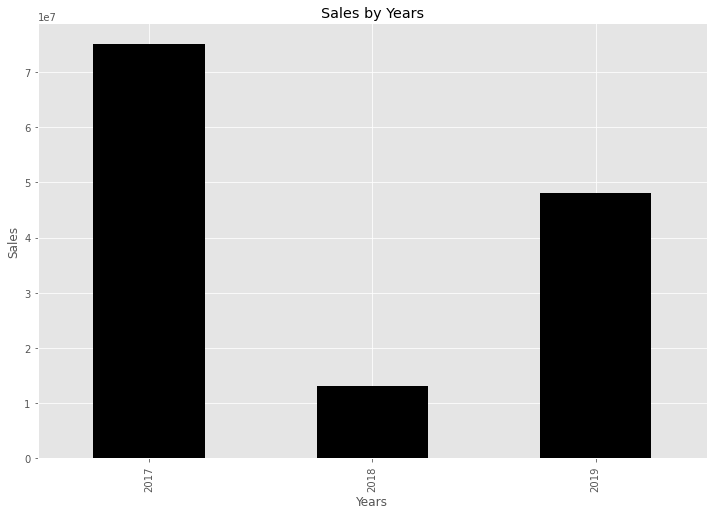

In [53]:
year_wise_sales.plot(kind='bar' , color='black')
plt.ylabel('Sales')
plt.title('Sales by Years');

### Sales By Months

In [50]:
month_wise_sales=final_data.groupby('Months')['Sales Amount'].sum()
month_wise_sales

Months
1     13107298.09
2     14268697.20
3     15548050.88
4      8230890.23
5      8061716.88
6     12335613.22
7      9403568.53
8     10289227.88
9     12785807.71
10     9873058.57
11    11674955.19
12    10648181.99
Name: Sales Amount, dtype: float64

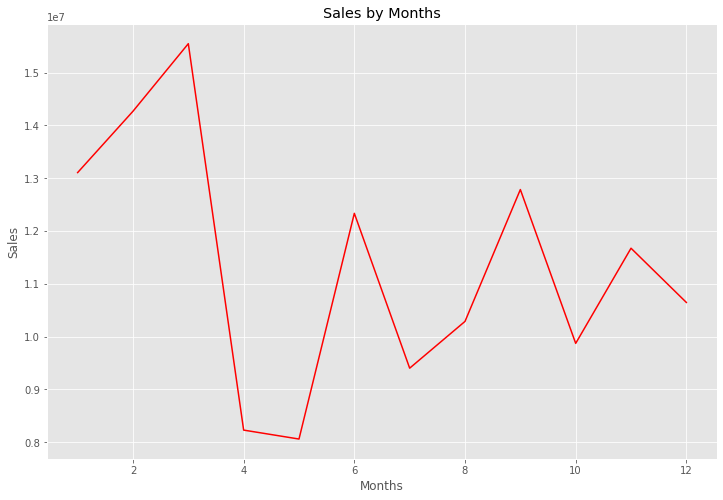

In [54]:
month_wise_sales.plot(kind='line',color='red')
plt.ylabel('Sales')
plt.title('Sales by Months');

### Sales By Days

In [55]:
day_wise_sales=final_data.groupby('Days')['Sales Amount'].sum()
day_wise_sales

Days
1     5112373.24
2     2594055.99
3     3940250.85
4     3775053.55
5     5763141.84
6     4395357.27
7     4146070.89
8     5014784.30
9     4774932.81
10    4677599.51
11    5221805.97
12    4061507.53
13    4197559.42
14    4059549.75
15    3022707.55
16    3909465.32
17    4965086.33
18    4474999.21
19    4579131.81
20    3869176.27
21    4767241.55
22    4615133.37
23    4183980.69
24    5642353.46
25    4294270.96
26    5281898.41
27    3818888.00
28    4933989.25
29    5957073.95
30    4647063.86
31    1530563.46
Name: Sales Amount, dtype: float64

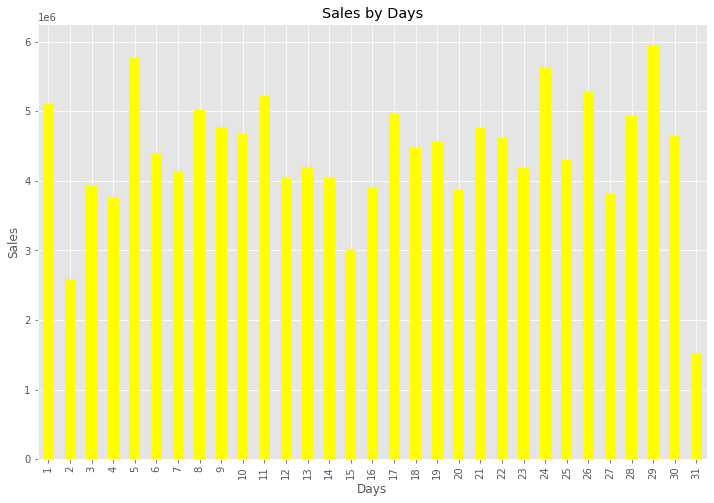

In [56]:
day_wise_sales.plot(kind='bar',color='Yellow')
plt.ylabel('Sales')
plt.title('Sales by Days');

## Top Customers

In [57]:
top_customers=final_data.groupby('Customer')['Sales Amount'].sum().head(5)
top_customers

Customer
A Supermarket        180549.30
A&B Shop             227440.19
A&R Market           103528.05
A-2-Z Supermarket    344124.34
A-ARVIN Store          2937.96
Name: Sales Amount, dtype: float64

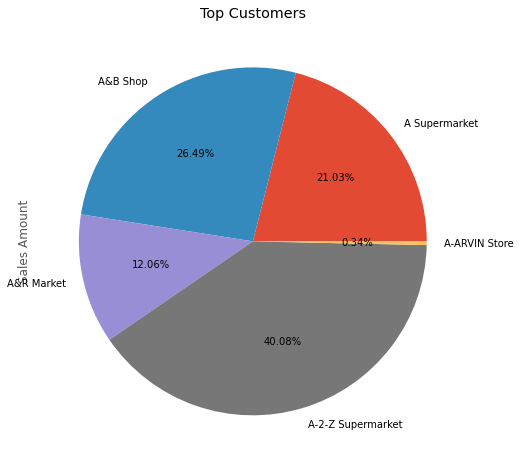

In [58]:
top_customers.plot(kind='pie',autopct='%2.2f%%')
plt.title('Top Customers');

# Have a look to a Dashboard in Tableau

LINK : https://public.tableau.com/app/profile/vani.kamboj/viz/Amazonsales_16557490940760/Dashboard1